In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras.utils import to_categorical, plot_model
from keras.preprocessing.image import ImageDataGenerator

#### Create image data generator object

In [2]:
train_datagen = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True) # define Data preparation

In [3]:
test_datagen = ImageDataGenerator(rescale=1/255)

#### Read the images

In [1]:
train = train_datagen.flow_from_directory(r'D:\Download\kagglecatsanddogs_5340\PetImages\Train', target_size=(64,64), class_mode='binary')

NameError: name 'train_datagen' is not defined

In [5]:
train.filenames

['apple\\1.jpg',
 'apple\\2.jpeg',
 'apple\\3.jpeg',
 'apple\\4.jpeg',
 'apple\\5.jpg',
 'apple\\6.jpg',
 'apple\\7.jpg',
 'orange\\1.jpeg',
 'orange\\2.jpg',
 'orange\\3.jpeg',
 'orange\\4.jpeg',
 'orange\\5.jpg',
 'orange\\6.jpg']

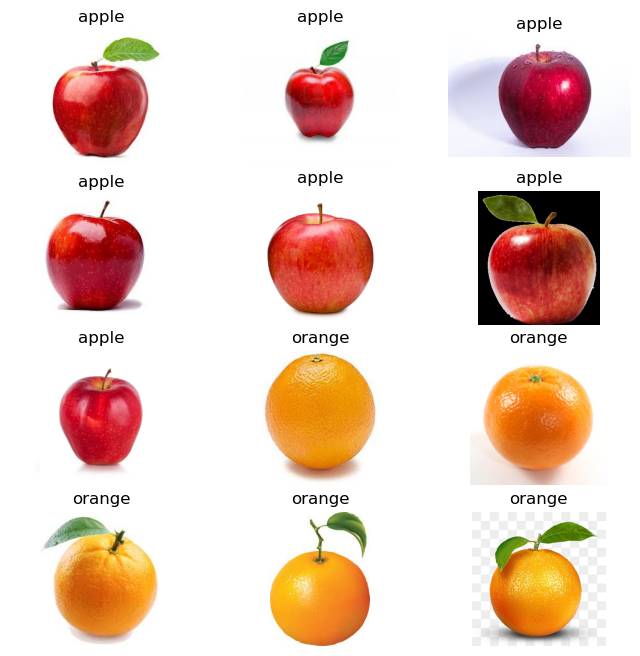

In [6]:
i = 1 
plt.figure(figsize=(8,8))
for fname in train.filenames:
    if i == 13:
        break
    img = plt.imread(train.directory+"/"+fname)
    plt.subplot(4,3,i)
    plt.axis('off')
    i += 1
    plt.title(fname.split('\\')[0])
    plt.imshow(img)
    

In [7]:
test = test_datagen.flow_from_directory(r'D:\NLP\day16\fruits\test_set', target_size=(64,64), class_mode='binary')


Found 6 images belonging to 2 classes.


#### Build the CNN Model

In [8]:
model = Sequential()

#1st convolution layer
model.add(Conv2D(filters=16,input_shape=(64,64,3),kernel_size=(3,3),activation='relu'))
#1st pooling layer 
model.add(MaxPool2D(pool_size=(2,2)))


#2nd convolution layer
model.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu'))
#2nd pooling layer 
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


### Compile the model

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
train.class_indices

{'apple': 0, 'orange': 1}

#### Train the model

In [11]:
model.fit (train, epochs=20, validation_data= test)

Epoch 1/20


1/1 [==============================] - 2s 2s/step - loss: 0.6792 - accuracy: 0.5385 - val_loss: 0.6727 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 199ms/step - loss: 0.6762 - accuracy: 0.6923 - val_loss: 0.6608 - val_accuracy: 0.6667
Epoch 3/20
1/1 [==============================] - 0s 209ms/step - loss: 0.6614 - accuracy: 1.0000 - val_loss: 0.6468 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 177ms/step - loss: 0.6361 - accuracy: 1.0000 - val_loss: 0.6336 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 197ms/step - loss: 0.6198 - accuracy: 1.0000 - val_loss: 0.6180 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 168ms/step - loss: 0.5870 - accuracy: 1.0000 - val_loss: 0.6005 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 159ms/step - loss: 0.5656 - accuracy: 1.0000 - val_loss: 0.5779 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=====

#### Predict the class of unseen data

In [12]:
import cv2
img = plt.imread(r'D:\NLP\day16\fruits\sample1.jpg')

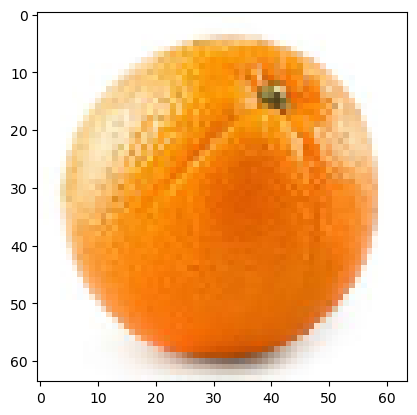

In [13]:
img = cv2.resize(img, (64,64))
plt.imshow(img)

In [15]:
img = img.reshape(1,64,64,3)
model.predict(img)[0][0]

1/1 [==============================] - 0s 41ms/step


1.0

In [16]:
import cv2
img = plt.imread(r'D:\NLP\day16\fruits\sample2.jpg')

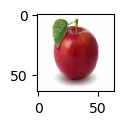

In [17]:
img = cv2.resize(img, (64,64))
plt.figure(figsize=(1,1))
plt.imshow(img)

In [20]:
img = img.reshape(1,64,64,3)
round(model.predict(img)[0][0], 0)

1/1 [==============================] - 0s 80ms/step


0.0

In [21]:
train.class_indices

{'apple': 0, 'orange': 1}